In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import math
import numpy as np
import operator
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [0]:
df= pd.read_csv('yeast.data', sep='\s+', header=None, names = ['Names', 'Mcg', 'Gvh', 'Alm', 'Mit', 'Erl', 'Pox', 'Vac', 'Nuc','Class'])

In [13]:
df.head()

,Names,Mcg,Gvh,Alm,Mit,Erl,Pox,Vac,Nuc,Class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [14]:
X = df.drop(columns=['Class', 'Names'], inplace=False).values
y = df['Class'].values

X

array([[0.58, 0.61, 0.47, ..., 0.  , 0.48, 0.22],
       [0.43, 0.67, 0.48, ..., 0.  , 0.53, 0.22],
       [0.64, 0.62, 0.49, ..., 0.  , 0.53, 0.22],
       ...,
       [0.67, 0.57, 0.36, ..., 0.  , 0.56, 0.22],
       [0.43, 0.4 , 0.6 , ..., 0.  , 0.53, 0.39],
       [0.65, 0.54, 0.54, ..., 0.  , 0.53, 0.22]])

In [0]:
#Euclidean Distance
def calculate_euclidean_distance(X, point, k):
  
    d = np.sqrt(np.sum(pow((X - point),2) , axis=1))
    return d

In [0]:
#Get Nearest Neighbors
def get_K_Nearest_Neighbors(distance, k):
    return np.argsort(distance)[:k]

In [0]:
#get predictions
def predict_label(X, y, points, k):
    labels=[]
    
    for p in points:
      
        dist = calculate_euclidean_distance(X, p, k)
        
        neighbors = get_K_Nearest_Neighbors(dist, k)
        
        results=[]
        for i in neighbors:
            results.append(y[i])
        
        label = Counter(results).most_common(1)
        labels.append(label[0][0])
        
    return labels

In [0]:
#cross_validation
def apply_cross_validation(folds, X, y, k):
    k_fold = KFold(n_splits=folds)
    
    accuracy_array = []
    
    for train_index, test_index in k_fold.split(X):
        y_train, y_test = y[train_index], y[test_index]
       
        X_train, X_test = X[train_index], X[test_index]       
        
        preds = predict_label(X_train, y_train, X_test, k)
          
        accuracy = calculate_accuracy(y_test, preds)
        accuracy_array.append(accuracy)
        
    return max(accuracy_array)

In [0]:
def calculate_accuracy(y_test, predictions):
    correct = 0
    for x in range(len(y_test)):
        if y_test[x] == predictions[x]:
            correct += 1
    return (correct/float(len(y_test))) * 100.0

In [0]:
#accuracy for different k values

k_accu = {}
for k in range(1,31):

  #10-fold cross validation
  k_accu[k] = apply_cross_validation(10, X, y, k)
  

In [22]:
#Best k-value and best performance
best_ = sorted(k_accu.items(), key=operator.itemgetter(1), reverse=True)[0]

print("Best k=%d \nBest cross validation accuracy:%f" % (best_[0], best_[1]))

Best k=17 
Best cross validation accuracy:65.100671


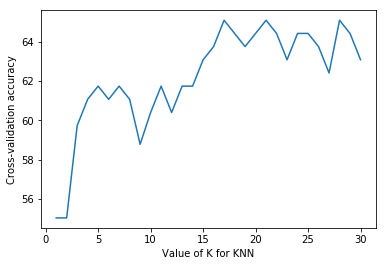

In [23]:
#Different values of K from 1 to 31 vs cross-validation accuracy
plt.plot(k_accu.keys(), k_accu.values())
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validation accuracy')
plt.show()